<a href="https://colab.research.google.com/github/yunjinchoidev/ai/blob/main/kaggle/%5BKaggle%5D_Aerial_Cactus_Identification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
!kaggle competitions download -c aerial-cactus-identification

 42% 5.00M/12.0M [00:00<00:00, 43.3MB/s]
100% 12.0M/12.0M [00:00<00:00, 86.2MB/s]


In [2]:
import os

In [12]:
os.environ['KAGGLE_USERNAME'] = 'yunjinchoidev'
os.environ['KAGGLE_KEY'] = '3d90c15ed3e0411bd30537de9f540179'

In [15]:
!unzip '*.zip'

Archive:  aerial-cactus-identification.zip
  inflating: sample_submission.csv   
  inflating: test.zip                
  inflating: train.csv               
  inflating: train.zip               


In [14]:
ls

aerial-cactus-identification.zip  sample_data/


In [16]:
import pandas as pd

In [18]:
labels = pd.read_csv('train.csv')
submission = pd.read_csv('sample_submission.csv')

In [19]:
labels.head()

,id,has_cactus
0,0004be2cfeaba1c0361d39e2b000257b.jpg,1
1,000c8a36845c0208e833c79c1bffedd1.jpg,1
2,000d1e9a533f62e55c289303b072733d.jpg,1
3,0011485b40695e9138e92d0b3fb55128.jpg,1
4,0014d7a11e90b62848904c1418fc8cf2.jpg,1


In [20]:
submission.head()

,id,has_cactus
0,000940378805c44108d287872b2f04ce.jpg,0.5
1,0017242f54ececa4512b4d7937d1e21e.jpg,0.5
2,001ee6d8564003107853118ab87df407.jpg,0.5
3,002e175c3c1e060769475f52182583d0.jpg,0.5
4,0036e44a7e8f7218e9bc7bf8137e4943.jpg,0.5


In [21]:
import matplotlib as mpl

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
mpl.rc('font', size=15)
plt.figure(figsize=(7,7))

<Figure size 504x504 with 0 Axes>

<Figure size 504x504 with 0 Axes>

In [27]:
label = ['Has cactus', 'Hasn\'t cactus'] # 타깃값 레이블

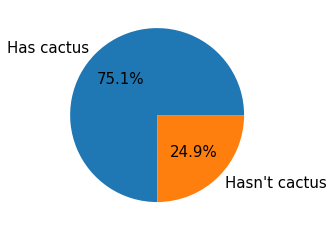

In [30]:
plt.pie(labels['has_cactus'].value_counts(), labels=label, autopct='%.1f%%');

In [31]:
from zipfile import ZipFile

In [32]:
with ZipFile('train.zip') as zipper:
  zipper.extractall()

In [34]:
with ZipFile('test.zip') as zipper:
  zipper.extractall()

In [35]:
ls

aerial-cactus-identification.zip  sample_submission.csv  test.zip  train.csv
sample_data/                      test/                  train/    train.zip


In [36]:
import os

num_train = len(os.listdir('train/'))
num_test = len(os.listdir('test/'))

print(f'훈련 데이터 개수: {num_train}')
print(f'테스트 데이터 개수: {num_test}')

훈련 데이터 개수: 17500
테스트 데이터 개수: 4000


In [37]:
import matplotlib.gridspec as gridspec
import cv2

mpl.rc('font', size=7)
plt.figure(figsize=(15, 6))
grid=gridspec.GridSpec(2,6)

last_has_cactus_img_name = lables[lables['has_cactus']==1]['id'][-12:]

<Figure size 1080x432 with 0 Axes>

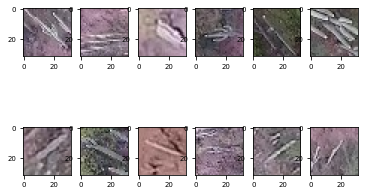

In [38]:
for idx, img_name in enumerate(last_has_cactus_img_name):
    img_path = 'train/' + img_name                 # 이미지 파일 경로 
    image = cv2.imread(img_path)                   # 이미지 파일 읽기 
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # 이미지 색상 보정 
    ax = plt.subplot(grid[idx])
    ax.imshow(image)     

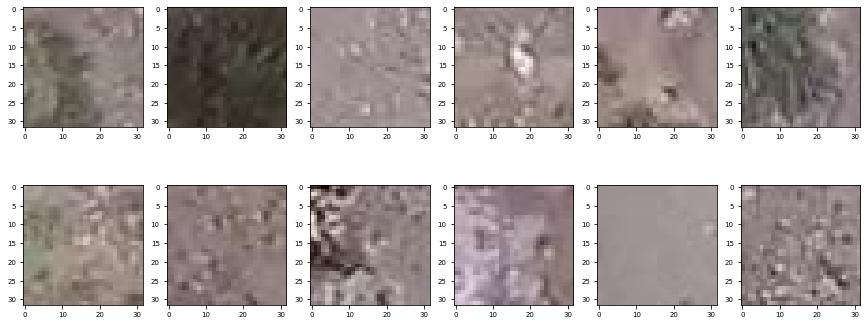

In [39]:
plt.figure(figsize=(15, 6))    # 전체 Figure 크기 설정
grid = gridspec.GridSpec(2, 6) # 서브플롯 배치
    
# 선인장을 포함하지 않는 이미지 파일명(마지막 12개) 
last_hasnt_cactus_img_name = labels[labels['has_cactus']==0]['id'][-12:]

# 이미지 출력 
for idx, img_name in enumerate(last_hasnt_cactus_img_name):
    img_path = 'train/' + img_name                 # 이미지 파일 경로
    image = cv2.imread(img_path)                   # 이미지 파일 읽기
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # 이미지 색상 보정
    ax = plt.subplot(grid[idx])
    ax.imshow(image)                               # 이미지 출력 